In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression, LogisticRegressionCV, LinearRegression,\
    ElasticNet, ElasticNetCV, MultiTaskElasticNet, MultiTaskElasticNetCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from nnpiv.rkhs import ApproxRKHSIVCV, RKHSIVCV, RKHS2IVL2
from sklearn.pipeline import Pipeline

from pathlib import Path
import numpy as np
#from mliv.neuralnet.deepiv_fit import deep_iv_fit
from nnpiv.tsls import tsls, regtsls
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
from nnpiv.semiparametrics import DML_longterm, DML_joint_longterm
from nnpiv.semiparametrics import DML_npiv

In [3]:

# Read the CSV file into a DataFrame
df = pd.read_csv('../data/data_star.csv', header=0)


In [4]:
df = pd.read_csv('../data/data_star.csv', header=0)

# Bind covariates
Xnan = df[["z_score_prior"]].values
X = df[["z_score_prior"]].values
G = df[["G"]].values
D = df[["D"]].values
S = df[["z_score3"]].values
V = df[["z_score_prior"]].values
Y = df[["z_score8"]].values


#drop NaNs
X = X[~np.isnan(Xnan)].reshape(-1,1)
G = G[~np.isnan(Xnan)].reshape(-1,1)
D = D[~np.isnan(Xnan)].reshape(-1,1)
S = S[~np.isnan(Xnan)].reshape(-1,1)
Y = Y[~np.isnan(Xnan)].reshape(-1,1)
V = V[~np.isnan(Xnan)].reshape(-1,1)

ones = np.ones((X.shape[0], 1))
 

In [5]:
m1 = ApproxRKHSIVCV(kernel_approx='nystrom', n_components=200,
                                   kernel='rbf', gamma=.001, delta_scale='auto',
                                   delta_exp=.4, alpha_scales=np.geomspace(1, 10000, 10), cv=10)

m2 = ApproxRKHSIVCV(kernel_approx='nystrom', n_components=200,
                                   kernel='rbf', gamma=.001, delta_scale='auto',
                                   delta_exp=.4, alpha_scales=np.geomspace(1, 10000, 10), cv=10)



In [6]:
df = pd.read_csv('../data/data_star.csv', header=0)
# Bind covariates
Xnan = df[["z_score_prior"]].values
X = df[["z_score_prior"]].values
G = df[["G"]].values
D = df[["D"]].values
S = df[["z_score3"]].values
V = df[["z_score_prior"]].values
Y = df[["z_score8"]].values


#drop NaNs
X = X[~np.isnan(Xnan)].reshape(-1,1)
G = G[~np.isnan(Xnan)].reshape(-1,1)
D = D[~np.isnan(Xnan)].reshape(-1,1)
S = S[~np.isnan(Xnan)].reshape(-1,1)
Y = Y[~np.isnan(Xnan)].reshape(-1,1)
V = V[~np.isnan(Xnan)].reshape(-1,1)

ones = np.ones((X.shape[0], 1))

In [7]:
percentiles = np.arange(5, 95, 5)
#Input the vector little v where wwe want to center local estimate theta
v_values = np.percentile(V, percentiles)


In [10]:
m1 = ApproxRKHSIVCV(kernel_approx='nystrom', n_components=400,
                                   kernel='rbf', gamma=.1, delta_scale='auto',
                                   delta_exp=.4, alpha_scales=np.geomspace(1, 10000, 10), cv=10)

m2 = ApproxRKHSIVCV(kernel_approx='nystrom', n_components=400,
                                   kernel='rbf', gamma=.1, delta_scale='auto',
                                   delta_exp=.4, alpha_scales=np.geomspace(1, 10000, 10), cv=10)

#m1 = tsls()
#m2 = tsls()

Rep: 1


100%|██████████| 10/10 [06:26<00:00, 38.63s/it]


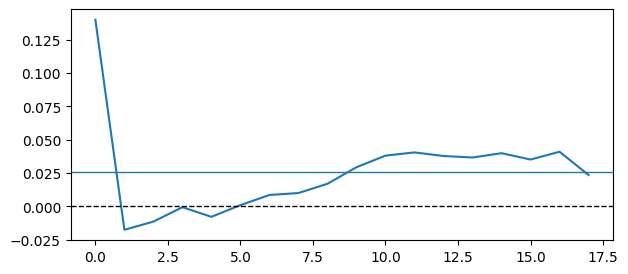

In [11]:

dml_2sls = DML_joint_longterm(Y, D, S, G, X1=None, V=X, v_values = v_values,
                        estimator='MR',
                        loc_kernel='gau',
                        bw_loc='silverman',
                        longterm_model='surrogacy',
                        ci_type = 'uniform',
                        model1 = RKHS2IVL2(kernel='rbf', gamma=.0013, delta_scale='auto', delta_exp=10),
                n_folds=10, n_rep=1, CHIM = False, prop_score=LogisticRegression(max_iter=2000), opts = {'lin_degree': 1})


dml_2sls = DML_longterm(Y, D, S, G, X1=None, V=X, v_values = v_values,
                        estimator='MR',
                        loc_kernel='gau',
                        bw_loc='silverman',
                        longterm_model='surrogacy',
                        model1 = m1,
                        model2 = m2,
                n_folds=10, n_rep=1, CHIM = False, prop_score=LogisticRegression(max_iter=2000), opts = {'lin_degree': 1})

theta, vart, ci = dml_2sls.dml()

lower_ci = ci[:, 0]
upper_ci = ci[:, 1]
yerr = [theta - lower_ci, upper_ci - theta]

plt.figure(figsize=(7, 3))
plt.plot(theta)
plt.axhline(np.mean(theta, axis=0), linewidth=1)  # Adjust line properties as needed
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Adjust line properties as needed

Rep: 1


  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [08:27<00:00, 50.77s/it]


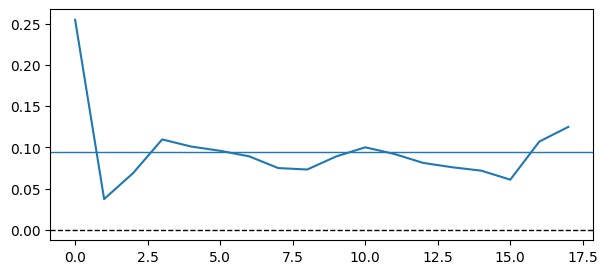

In [12]:

dml_2sls = DML_joint_longterm(Y, D, S, G, X1=None, V=X, v_values = v_values,
                        estimator='MR',
                        loc_kernel='gau',
                        bw_loc='silverman',
                        ci_type = 'uniform',
                        longterm_model='latent_unconfounded',
                        model1 = RKHS2IVL2(kernel='rbf', gamma=.0013, delta_scale='auto', delta_exp=10),
                n_folds=10, n_rep=1, CHIM = False, prop_score=LogisticRegression(max_iter=2000), opts = {'lin_degree': 1})


dml_2sls = DML_longterm(Y, D, S, G, X1=None, V=X, v_values = v_values,
                        estimator='MR',
                        loc_kernel='gau',
                        bw_loc='silverman',
                        longterm_model='latent_unconfounded',
                        model1 = m1,
                        model2 = m2,
                n_folds=10, n_rep=1, prop_score=LogisticRegression(max_iter=2000))

theta_l, vart_l, ci_l = dml_2sls.dml()

lower_ci_l = ci_l[:, 0]
upper_ci_l = ci_l[:, 1]
yerr_l = [theta_l - lower_ci_l, upper_ci_l - theta_l]

plt.figure(figsize=(7, 3))
plt.plot(theta_l)
plt.axhline(np.mean(theta_l, axis=0), linewidth=1)  # Adjust line properties as needed
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Adjust line properties as needed

Rep: 1


100%|██████████| 10/10 [00:01<00:00,  9.97it/s]


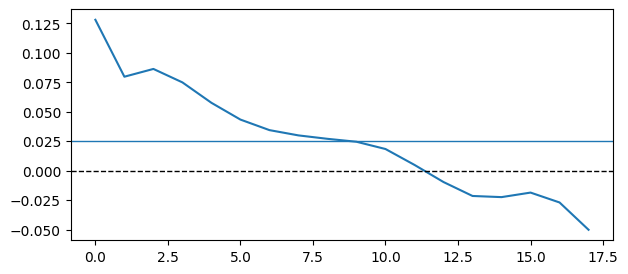

In [13]:
ind = np.where(G == 0)[0]
Y1 = Y[ind]
D1 = D[ind]
X11 = X[ind]
ones1 = ones[ind]

dml_npiv = DML_npiv(Y1, D1, ones1, ones1, V=X11, v_values = v_values,
                        estimator='OR',
                        loc_kernel='gau',
                        bw_loc='silverman',
                        ci_type = 'uniform',
                        model1 = tsls(),
                        modelq1 = tsls(),
                n_folds=10, n_rep=1, CHIM = False, prop_score=LogisticRegression(max_iter=2000), opts = {'lin_degree': 1})

theta_oracle, vart_oracle, ci_oracle = dml_npiv.dml()

lower_ci_oracle = ci_oracle[:, 0]
upper_ci_oracle = ci_oracle[:, 1]
yerr_oracle = [theta_oracle - lower_ci_oracle, upper_ci_oracle - theta_oracle]

plt.figure(figsize=(7, 3))
plt.plot(theta_oracle)
plt.axhline(np.mean(theta_oracle, axis=0), linewidth=1)  # Adjust line properties as needed
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Adjust line properties as needed

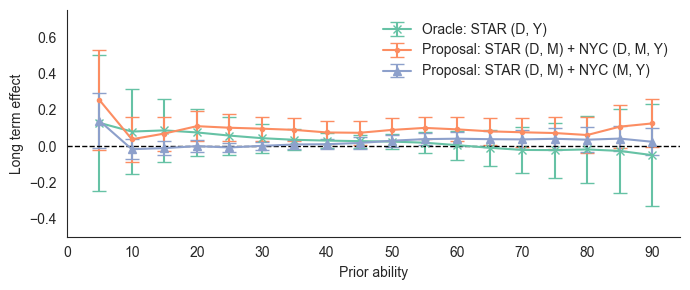

In [14]:

plt.figure(figsize=(7, 3))
sns.set_style("white")
sns.set_palette("Set2")

# Generating the line plot with error bars (confidence intervals)
plt.errorbar(percentiles, theta_oracle, yerr=yerr_oracle, marker='x', capsize=5, label='Oracle: STAR (D, Y)')
plt.errorbar(percentiles, theta_l, yerr=yerr_l, marker='.', capsize=5, label='Proposal: STAR (D, M) + NYC (D, M, Y)')
plt.errorbar(percentiles, theta, yerr=yerr, marker='^', capsize=5, label='Proposal: STAR (D, M) + NYC (M, Y)')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Adjust line properties as needed

#set size of y-axis
plt.ylim(-0.5, 0.75)
#set x-axis limits


plt.xlabel('Prior ability')
plt.ylabel('Long term effect')
plt.legend(frameon=False)

plt.tight_layout()
sns.despine()

# Setting x-axis ticks every 10 units
plt.xticks(np.arange(0, 100, 10))
plt.savefig('plot_longterm_cate.png', dpi=600, bbox_inches='tight')  # Adjust options as needed


Rep: 1


  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:01<00:00,  6.19it/s]


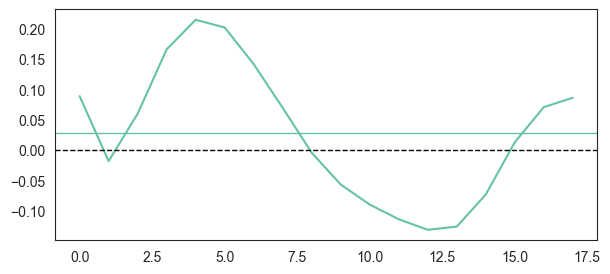

In [15]:
ind = np.where(G == 0)[0]
S1 = S[ind]
D1 = D[ind]
X11 = X[ind]
ones1 = ones[ind]

dml_npiv = DML_npiv(S1, D1, ones1, ones1, V=X11, v_values = v_values,
                        estimator='MR',
                        loc_kernel='gau',
                        bw_loc='silverman',
                        model1 = tsls(),
                        modelq1 = tsls(),
                n_folds=10, n_rep=1, CHIM = False, prop_score=LogisticRegression(max_iter=2000), opts = {'lin_degree': 1})

theta_surr, vart_surr, ci_surr = dml_npiv.dml()

lower_ci_surr = ci_surr[:, 0]
upper_ci_surr = ci_surr[:, 1]
yerr_surr = [theta_surr - lower_ci_surr, upper_ci_surr - theta_surr]

plt.figure(figsize=(7, 3))
plt.plot(theta_surr)
plt.axhline(np.mean(theta_surr, axis=0), linewidth=1)  # Adjust line properties as needed
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Adjust line properties as needed

In [16]:
theta_surr

array([ 0.08898983, -0.01831743,  0.05999739,  0.1662372 ,  0.21500749,
        0.20231949,  0.14185961,  0.06963724, -0.0044249 , -0.05683171,
       -0.08988212, -0.11417247, -0.13150704, -0.12629926, -0.07330398,
        0.01293056,  0.07089818,  0.08631948])

In [17]:
theta_l

array([0.25455075, 0.03722123, 0.06878856, 0.10950962, 0.10088438,
       0.09573373, 0.08900892, 0.07479459, 0.07304181, 0.08890736,
       0.09994625, 0.09192515, 0.08104324, 0.07577897, 0.07166097,
       0.06073352, 0.10692847, 0.12470655])